# Winner World Cup 2022 Simulation ⚽

![image.png](attachment:431fd0f5-8489-4672-9453-285a0cd490b8.png)


# RESULTS 

GROUP A: Netherlands,Senegal, Ecuador, Qatar

GROUP B: England, USA, Wales, Iran

GROUP C: Argentina, Mexico, Poland, SA

GROUP D: France, Denmark, Australia, Tunisia

GROUP E: Spain, Germany, Japan, Costa rica

GROUP F: Belgium, Croatia, Morocco, Canada

GROUP G: Brazil, Switzerland, Serbia, Camerron

GROUP H: Portgual, Urugary, Korea, Ghana

ROUND OF 16 WINNERS: Spain, Brazil, USA, Argentina, Belgium, Portugal, England, France

Quarter Final Winners: Brazil, Argentina, Belgium, France

Semi Final Winners: Brazil, France

Final Winners: Brazil

thirds place: Belgium

# 1) EDA

In [ ]:
#Usual Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df = pd.read_csv('international_matches.csv')
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

### 1.1) Top 10 Fifa Rank 

In [ ]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')
#fifa_points_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nlargest(10, 'rank_points') 

#let's see the 5 strongest teams
fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


### 1.2) Top 10 Offensers

In [ ]:
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)
# offense
#last match that each country played
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


### 1.3) Top 10 Defenders

In [ ]:
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)
# offense
#last match that each country played
defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


### 1.4) Top 10 Midfield

In [ ]:
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)
# offense
#last match that each country played
midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


### 1.5) Top 10 Total Score

In [ ]:
df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['diff_total_score'] = df['home_total_score'] - df['away_total_score']

In [ ]:
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score [['date', 'home_team','home_total_score']].rename(columns = {'home_team': 'team', 'home_total_score' : 'total_score'})
away = total_score [['date', 'away_team','away_total_score']].rename(columns = {'away_team': 'team', 'away_total_score' : 'total_score'})
total_score  = home.append(away)
# offense
#last match that each country played
total_score   = total_score .sort_values(['team', 'date'], ascending=[True, False])
total_score ['row_number'] = defense .groupby('team').cumcount()+1
total_score_top_10 = total_score [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'total_score')
total_score_top_10

,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


# 2) Simulation

## 2.1) Feature Engineering

In [ ]:
# feature generation
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 # take draw as lost
df['is_stake'] = df['tournament'] != 'Friendly'

## 2.2) Model

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference','is_stake']], df['is_won']
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train, y_train)
pred_labels_tree = tree.predict(X_test)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)
pred_labels_logit = logreg.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
pred_labels_svm = svm.predict(X_test)

rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
pred_labels_rf = rf.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_labels_knn = knn.predict(X_test)




# Compare the models
print("Decision Tree: \n", classification_report(y_test, pred_labels_tree))
print("Logistic Regression: \n", classification_report(y_test, pred_labels_logit))
print("SVM: \n", classification_report(y_test, pred_labels_svm))
print("Random Tree: \n", classification_report(y_test, pred_labels_rf))
print("KNN: \n", classification_report(y_test, pred_labels_knn))

print("dt_accuracy_score:", accuracy_score(y_test, pred_labels_tree))
print('log_score:' ,accuracy_score(y_test, pred_labels_logit))
print("svm_accuracy_score:", accuracy_score(y_test, pred_labels_svm))
print("rf_accuracy_score:", accuracy_score(y_test, pred_labels_rf))
print('knn_acc_score:' ,accuracy_score(y_test, pred_labels_knn))

Decision Tree: 
               precision    recall  f1-score   support

       False       0.59      0.64      0.62      2453
        True       0.59      0.54      0.56      2332

    accuracy                           0.59      4785
   macro avg       0.59      0.59      0.59      4785
weighted avg       0.59      0.59      0.59      4785

Logistic Regression: 
               precision    recall  f1-score   support

       False       0.68      0.70      0.69      2453
        True       0.68      0.66      0.67      2332

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68      0.68      0.68      4785

SVM: 
               precision    recall  f1-score   support

       False       0.68      0.72      0.70      2453
        True       0.68      0.65      0.66      2332

    accuracy                           0.68      4785
   macro avg       0.68      0.68      0.68      4785
weighted avg       0.68    

In [ ]:
#shorting the train dataset so i can do random search and it wont take as long
X_train1= X_train.iloc[:9568, ]
y_train1= y_train.iloc[:9568, ]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters= {'C': [0.1,1,10], 'gamma': [0.00001, 0.0001, 0.001, 0.01, 1]}
searcher= RandomizedSearchCV(svm, parameters, verbose=3)
searcher.fit(X_train1, y_train1)
print('Best CV params:' , searcher.best_params_)
print('best CV accuracy:', searcher.best_score_)
 
# print('Test accuracy of best grid search hypers:', searcher.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................C=1, gamma=1e-05;, score=0.668 total time=   3.0s
[CV 2/5] END ..................C=1, gamma=1e-05;, score=0.684 total time=   2.8s
[CV 3/5] END ..................C=1, gamma=1e-05;, score=0.677 total time=   2.8s
[CV 4/5] END ..................C=1, gamma=1e-05;, score=0.662 total time=   2.9s
[CV 5/5] END ..................C=1, gamma=1e-05;, score=0.680 total time=   2.7s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.636 total time=   4.8s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.637 total time=   5.1s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.638 total time=   5.0s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.610 total time=   5.0s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.630 total time=   5.2s
[CV 1/5] END ................C=10, gamma=0.0001;, score=0.666 total time=   4.0s
[CV 2/5] END ................C=10, gamma=0.0001;

In [ ]:
svm1= SVC(gamma= 0.0001, C=0.1, random_state=10, probability=True)
svm1.fit(X_train, y_train)
ywhat= svm1.predict(X_test)
print("svm_accuracy_score:", accuracy_score(y_test, ywhat))


svm_accuracy_score: 0.6829676071055382


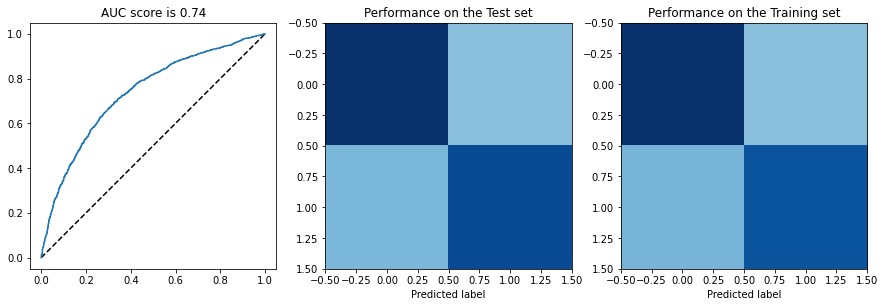

In [ ]:
svm1= SVC(gamma= 0.0001, C=0.1, random_state=10, probability=True)#features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('svm1_model', svm1)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass


## 2.3) Test

In [ ]:
#Creating list of all world cup teams and combination of games for the knockout stages

teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'USA',
                  'Wales', 'IR Iran','Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

teams_worldcup1 = ['Qatar', 'Senegal',   'Ecuador', 'Netherlands',   'England', 'Wales',
                  'USA', 'IR Iran', 'Argentina', 'Mexico',  'Saudi Arabia', 'Poland',   'France', 'Denmark', 
                  'Australia', 'Tunisia',   'Spain', 'Germany', 'Costa Rica', 'Japan', 
                  'Canada', 'Morocco',  'Belgium', 'Croatia',   'Serbia', 'Switzerland', 
                  'Brazil', 'Cameroon',  'Portugal', 'Uruguay',  'Ghana', 'Korea Republic']

teams_worldcup2 = ['Qatar', 'Netherlands',   'Ecuador', 'Senegal',   'England', 'IR Iran',
                  'USA', 'Wales', 'Argentina', 'Poland',  'Saudi Arabia', 'Mexico',   'France', 'Tunisia', 
                  'Australia', 'Denmark',   'Spain', 'Japan', 'Costa Rica', 'Germany', 
                  'Canada', 'Croatia',  'Belgium', 'Morocco',   'Serbia', 'Cameroon', 
                  'Brazil', 'Switzerland',  'Portugal', 'Korea Republic',  'Ghana', 'Uruguay']


In [ ]:
group_a= ['Qatar', 'Ecuador', 'Senegal', 'Netherlands']
group_b= ['England', 'USA', 'Wales', 'IR Iran']
group_c= ['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
group_d= ['France', 'Australia', 'Denmark', 'Tunisia']
group_e= ['Spain', 'Costa Rica', 'Germany', 'Japan']
group_f= ['Belgium', 'Canada', 'Morocco', 'Croatia']
group_g= ['Brazil', 'Serbia', 'Switzerland', 'Cameroon']
group_h= ['Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [ ]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [ ]:
#The idea is to separete the performance of each Team as Home or Away.
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [ ]:
world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [ ]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'IR Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Spain', 'Switzerland', 'Tunisia', 'USA',
       'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [ ]:
#GAME 1 for each team 

from tqdm import tqdm #SHOW TASK BAR

simulation_df_group= list()
simulation_results_group= list()
simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= teams_worldcup
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['group_stages', 'round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'group_stages':
            step_group = ['group_stages'] * 16
            candidates_round_group = zip(step_group, winners, prob)
            df_candidates_group = pd.DataFrame(candidates_round_group, columns = ['Step','Team','Prob'])
            simulation_df_group.append(df_candidates_group)
            simulation_results_group.append(winners)


        #if f == 'round_of_16':
         #   step_16 = ['round_16'] * 8
          #  candidates_round_16 = zip(step_16, winners, prob)
           # df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            #simulation_df_round16.append(df_candidates_round_16)
            #simulation_results_round16.append(winners)

        #if f == 'quarterfinal':
         #   step_quarterfinal = ['quarterfinal'] * 4
          #  candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
           # df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            #simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            #simulation_results_quarterfinal.append(winners)

        #if f == 'semifinal':    
           # step_semifinal = ['semifinal'] * 2
            #candidates_semifinal = zip(step_semifinal,winners, prob)
            #df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            #simulation_df_semifinal.append(df_candidates_semifinal)
            #simulation_results_semifinal.append(winners)

        #if f == 'final':    
         #   step_final = ['final'] * 1
          #  candidates_final = zip(step_final,winners, prob)
           # df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            #simulation_winners.append(df_candidates_final)
            #simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_group_stages= pd.concat(simulation_df_group)
#df_candidates_round_16 = pd.concat(simulation_df_round16)
#df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
#df_candidates_semifinal = pd.concat(simulation_df_semifinal)
#df_candidates_final = pd.concat(simulation_winners)

#df_results = pd.concat([df_candidates_group_stages, df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_group= sum(simulation_results_group, [])
# simulation_results_round16 = sum(simulation_results_round16, [])
# simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
#simulation_results_semifinal = sum(simulation_results_semifinal, [])
# simulations_winners = sum(simulation_results_winners, [])


100%|██████████| 1000/1000 [01:32<00:00, 10.87it/s]


In [ ]:
#Counter is used to easily count recurrent elements in a list check this link for more info (https://realpython.com/python-counter/)
from collections import Counter

In [ ]:
# game 1 results
df_candidates_group_stages.Team.value_counts()

Netherlands       750
Croatia           750
Switzerland       749
Portugal          742
Spain             730
Belgium           721
Uruguay           719
Brazil            714
Argentina         709
Denmark           709
Mexico            708
France            706
Germany           684
England           676
Ecuador           612
Wales             570
IR Iran           430
Qatar             388
USA               324
Japan             316
Australia         294
Poland            292
Tunisia           291
Saudi Arabia      291
Serbia            286
Korea Republic    281
Canada            279
Costa Rica        270
Ghana             258
Cameroon          251
Senegal           250
Morocco           250
Name: Team, dtype: int64

In [ ]:
# GAME 2 for each teams

from tqdm import tqdm #SHOW TASK BAR

simulation_df_group1= list()
simulation_results_group1= list()


n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= teams_worldcup1
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['group_stages', 'round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'group_stages':
            step_group = ['group_stages'] * 16
            candidates_round_group = zip(step_group, winners, prob)
            df_candidates_group = pd.DataFrame(candidates_round_group, columns = ['Step','Team','Prob'])
            simulation_df_group1.append(df_candidates_group)
            simulation_results_group1.append(winners)


       
        candidates = winners 

df_candidates_group_stages1= pd.concat(simulation_df_group1)

In [ ]:
# game 2 results
df_candidates_group_stages1.Team.value_counts()

Morocco           743
Switzerland       740
Brazil            738
Japan             737
England           730
Netherlands       719
Poland            711
Senegal           708
Belgium           702
Tunisia           699
Korea Republic    693
France            689
USA               620
Argentina         546
Spain             532
Portugal          531
Uruguay           469
Germany           468
Mexico            454
IR Iran           380
Denmark           311
Ghana             307
Australia         301
Croatia           298
Qatar             292
Saudi Arabia      289
Ecuador           281
Wales             270
Costa Rica        263
Cameroon          262
Serbia            260
Canada            257
Name: Team, dtype: int64

In [ ]:
# GAME 3 and concat all results into one dataframe

from tqdm import tqdm #SHOW TASK BAR

simulation_df_group2= list()
simulation_results_group2= list()


n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= teams_worldcup2
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['group_stages', 'round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'group_stages':
            step_group = ['group_stages'] * 16
            candidates_round_group = zip(step_group, winners, prob)
            df_candidates_group = pd.DataFrame(candidates_round_group, columns = ['Step','Team','Prob'])
            simulation_df_group2.append(df_candidates_group)
            simulation_results_group2.append(winners)


       
        candidates = winners 

df_candidates_group_stages2= pd.concat(simulation_df_group2)


df_results = pd.concat([df_candidates_group_stages, df_candidates_group_stages1, df_candidates_group_stages2])



100%|██████████| 1000/1000 [01:23<00:00, 12.05it/s]


In [ ]:
## GROUP STAGE RESULTS BY EACH GROUP. Total of 3000 iterations


## create a list of our conditions
conditions = [(df_results.Team.isin(['Qatar', 'Ecuador', 'Senegal', 'Netherlands'])),
    (df_results.Team.isin(['England', 'USA', 'Wales', 'IR Iran'])),
    (df_results.Team.isin(['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'])),
    (df_results.Team.isin(['France', 'Australia', 'Denmark', 'Tunisia'])),
    (df_results.Team.isin(['Spain', 'Costa Rica', 'Germany', 'Japan'])),
    (df_results.Team.isin(['Belgium', 'Canada', 'Morocco', 'Croatia'])),
    (df_results.Team.isin(['Brazil', 'Serbia', 'Switzerland', 'Cameroon'])),
    (df_results.Team.isin(['Portugal', 'Ghana', 'Uruguay', 'Korea Republic']))]

## create a list of the values we want to assign for each condition
values = ["A", "B", "C", "D", "E", "F", "G", "H"]

## create a new column and use np.select to assign values to it using our lists as arguments
df_results["Group"] = np.select(conditions, values)

## display updated DataFrame
df_results.groupby("Group")["Team"].value_counts()

Group  Team          
A      Netherlands       2188
       Senegal           1679
       Ecuador           1172
       Qatar              961
B      England           2131
       USA               1403
       Wales             1381
       IR Iran           1085
C      Argentina         1956
       Mexico            1912
       Poland            1302
       Saudi Arabia       830
D      France            2106
       Denmark           1752
       Tunisia           1279
       Australia          863
E      Spain             1984
       Germany           1889
       Japan             1331
       Costa Rica         796
F      Belgium           2142
       Croatia           1777
       Morocco           1274
       Canada             807
G      Brazil            2147
       Switzerland       1794
       Serbia            1250
       Cameroon           809
H      Portugal          1968
       Uruguay           1902
       Korea Republic    1279
       Ghana              851
Name: Team, dtype:

In [ ]:
# teams that advance to round of 16 games
# list for each team playing each other
round_16_teams= [ 'Netherlands', 'USA', 'Argentina', 'Denmark']
round_16_teams1= ['France', 'Mexico', 'England', 'Senegal']
round_16_teams2= ['Spain', 'Croatia', 'Brazil', 'Uruguay']
round_16_teams3= ['Belgium', 'Germany', 'Portugal', 'Switzerland']

In [ ]:
# GAME 1 and 2 of round 16 

simulation_results_semifinal = list()
simulation_df_semifinal = list()


from tqdm import tqdm #SHOW TASK BAR


n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_16_teams
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_round_16 = pd.concat(simulation_df_semifinal)



#GAME 3 & 4 of ROUND 16

simulation_results_semifinal = list()
simulation_df_semifinal = list()
for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_16_teams1
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal1 = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal1)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_round_161 = pd.concat(simulation_df_semifinal)


# GAME 5 & 6 of ROUND 16

simulation_results_semifinal = list()
simulation_df_semifinal = list()
for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_16_teams2
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal2 = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal2)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_round_162 = pd.concat(simulation_df_semifinal)




# GAME 7 & 8 of ROUND 16

simulation_results_semifinal = list()
simulation_df_semifinal = list()
for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_16_teams3
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal3 = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal3)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_round_163 = pd.concat(simulation_df_semifinal)


df_candidates_round_16_results = pd.concat([df_candidates_round_16, df_candidates_round_161, df_candidates_round_162, df_candidates_round_163])



100%|██████████| 1000/1000 [00:09<00:00, 107.37it/s]


In [ ]:
# RESULTS OF ROUND 16 GAMES
df_candidates_round_16_results.Team.value_counts()

England        704
Brazil         696
Belgium        691
France         682
USA            596
Spain          592
Portugal       572
Argentina      556
Denmark        444
Switzerland    428
Croatia        408
Netherlands    404
Mexico         318
Germany        309
Uruguay        304
Senegal        296
Name: Team, dtype: int64

In [ ]:
# teams that advanced to round of 8
# SINCE A BRACKET we had to match up teams going against each other 

round_8_teams= ['Spain', 'Brazil', 'USA', 'Argentina']
round_8_teams1= ['Belgium', 'Portugal', 'England', 'France']


In [ ]:
# GAME 1 and 2 of quarterfinals 

simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_8_teams
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_quarter = pd.concat(simulation_df_semifinal)




# GAME 3 & 4 of quarterfinals

simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= round_8_teams1
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal1 = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal1)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 




df_candidates_quarter2 = pd.concat(simulation_df_semifinal)

df_candidates_quarterfinal_results= pd.concat([df_candidates_quarter, df_candidates_quarter2])


100%|██████████| 1000/1000 [00:09<00:00, 108.22it/s]


In [ ]:
# RESULTS of GAME from quarterfinals
df_candidates_quarterfinal_results.Team.value_counts()

France       731
Brazil       719
Argentina    714
Belgium      677
Portugal     323
USA          286
Spain        281
England      269
Name: Team, dtype: int64

In [ ]:
#teams that advanced to semi_finals 
semi_final_team= ['Brazil', 'Argentina', 'Belgium', 'France']

In [ ]:
#SEMI FINAL GAMES 

from tqdm import tqdm #SHOW TASK BAR

simulation_df_group= list()
simulation_results_group= list()
simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= semi_final_team
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)



        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 



df_candidates_semifinal = pd.concat(simulation_df_semifinal)



simulation_results_semifinal = sum(simulation_results_semifinal, [])


100%|██████████| 1000/1000 [00:11<00:00, 90.37it/s]


In [ ]:
# RESULTS OF SEMI FINAL GAMES
df_candidates_semifinal.Team.value_counts()

Brazil       525
France       513
Belgium      487
Argentina    475
Name: Team, dtype: int64

In [ ]:
# teams that advanced to finals
final_teams= ['France', 'Brazil']


In [ ]:
#FINALS GAME

n_simulations = 2000 #Number of Simulations


for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= final_teams
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        if f == 'final':    
          step_final = ['final'] * 1
          candidates_final = zip(step_final,winners, prob)
          df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
          simulation_winners.append(df_candidates_final)
          simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 


df_candidates_final = pd.concat(simulation_winners)


simulations_winners = sum(simulation_results_winners, [])


100%|██████████| 1000/1000 [00:05<00:00, 191.01it/s]


In [ ]:
# RESULTS OF FINALS 

df_candidates_final.Team.value_counts()
# BRAZIL WINS!

Brazil    1424
France     576
Name: Team, dtype: int64

In [ ]:
# runner up teams
run_ups= ['Belgium', 'Argentina']

In [ ]:
# 3rd place game

from tqdm import tqdm #SHOW TASK BAR

simulation_df_runner= list()
simulation_results_runner= list()
simulation_winners = list()
simulation_results_winners = list()



n_simulations = 2000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates= run_ups
    #candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['runner_up']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        

        
        if f == 'runner_up':    
          step_runner = ['runner_up'] * 1
          candidates_runner = zip(step_runner,winners, prob)
          df_candidates_runner = pd.DataFrame(candidates_runner, columns = ['Step','Team','Prob'])
          simulation_df_runner.append(df_candidates_runner)
          simulation_results_runner.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 


df_candidates_runner = pd.concat(simulation_df_runner)




100%|██████████| 2000/2000 [00:09<00:00, 211.38it/s]


In [ ]:
df_candidates_runner.Team.value_counts()
# Belgium runners up

Belgium      1260
Argentina     740
Name: Team, dtype: int64